## Clustering Veriyi Benzerliklerine göre kümelendirme

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('data/cars.xls')

In [5]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
#hatırlatma -
#Regression r2 RMSE #score yüksek olmalı
#Classsification Accuracy,F1 Score Classificition report and confusion matrix
#Clustersing silhoutte score -Score yüksek olmalı diye bir şey yok,y olmadığı için


In [7]:
x=df[['Price','Mileage','Cylinder']]

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [10]:
model=KMeans(4)# 4 tane cluster olsun

In [11]:
model=model.fit(x)

In [12]:
tahmin=model.predict(x)

In [13]:
tahmin

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [14]:
x['cluster']=tahmin

In [15]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [16]:
silhouette_score(x,tahmin)

0.41145279930127604

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'fiyat')

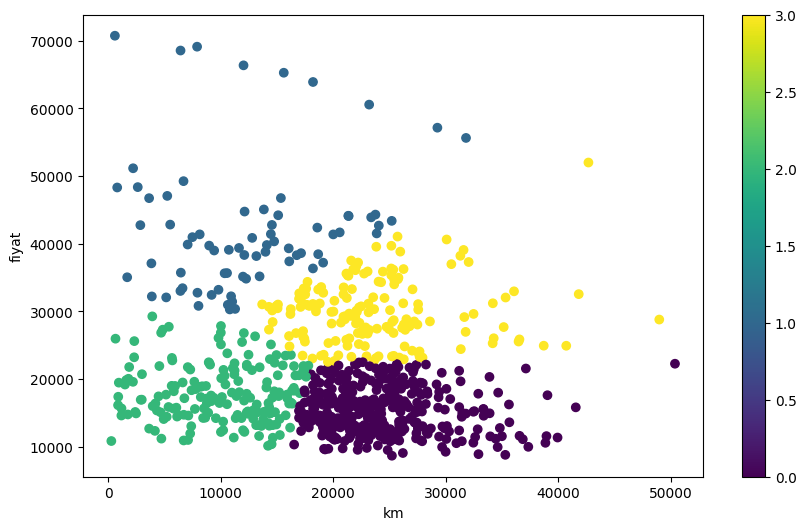

In [18]:
plt.figure(figsize=(10,6)) 
plt.scatter(x.Mileage,x.Price, c=tahmin)
plt.colorbar()
plt.xlabel('km')
plt.ylabel('fiyat')

In [19]:
wcss=[] #Within-Cluster Sum of Squares
ss=[]
for i in range(2, 10):
        model = KMeans(n_clusters=i)
        model = model.fit(x)
        tahmin = model.predict(x)
        ss1 = silhouette_score(x, tahmin)
        ss.append(ss1)
        print(ss1)
        wcss.append(model.inertia_)

0.4511454174067317
0.3555916594491686
0.4102243080509758
0.3938136327820155
0.3722270411987844
0.35516017009861184
0.3321501470805768
0.34393360651493887


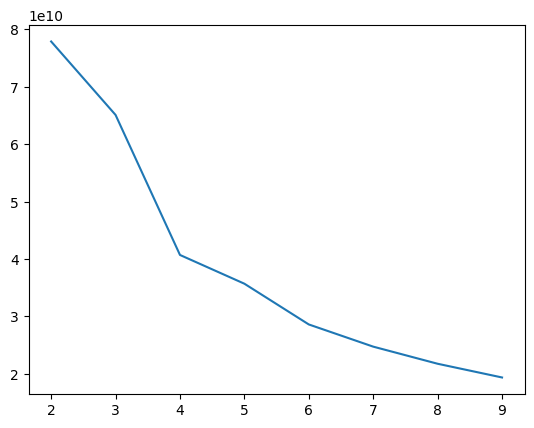

In [20]:
plt.plot(range(2,10),wcss)

In [21]:
import seaborn as sns

<Axes: >

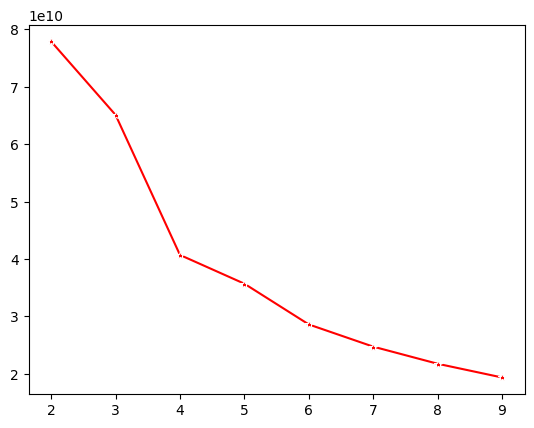

In [22]:
sns.lineplot(x=range(2,10),y=wcss,marker='*',c = 'red')

In [23]:
# pip install yellowbrick

In [24]:
from yellowbrick.cluster import KElbowVisualizer
# choose the model and visualize it.

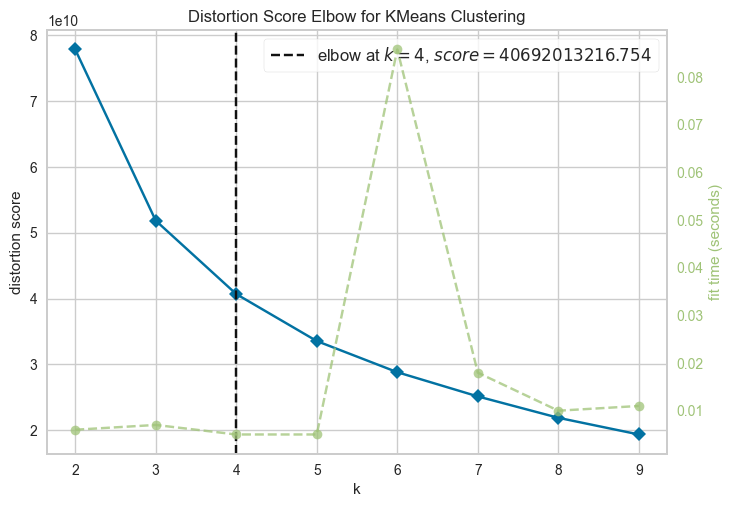

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [26]:
#Hierachical Clustering

In [27]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [28]:
data=linkage(x,method='ward',metric='euclidean')

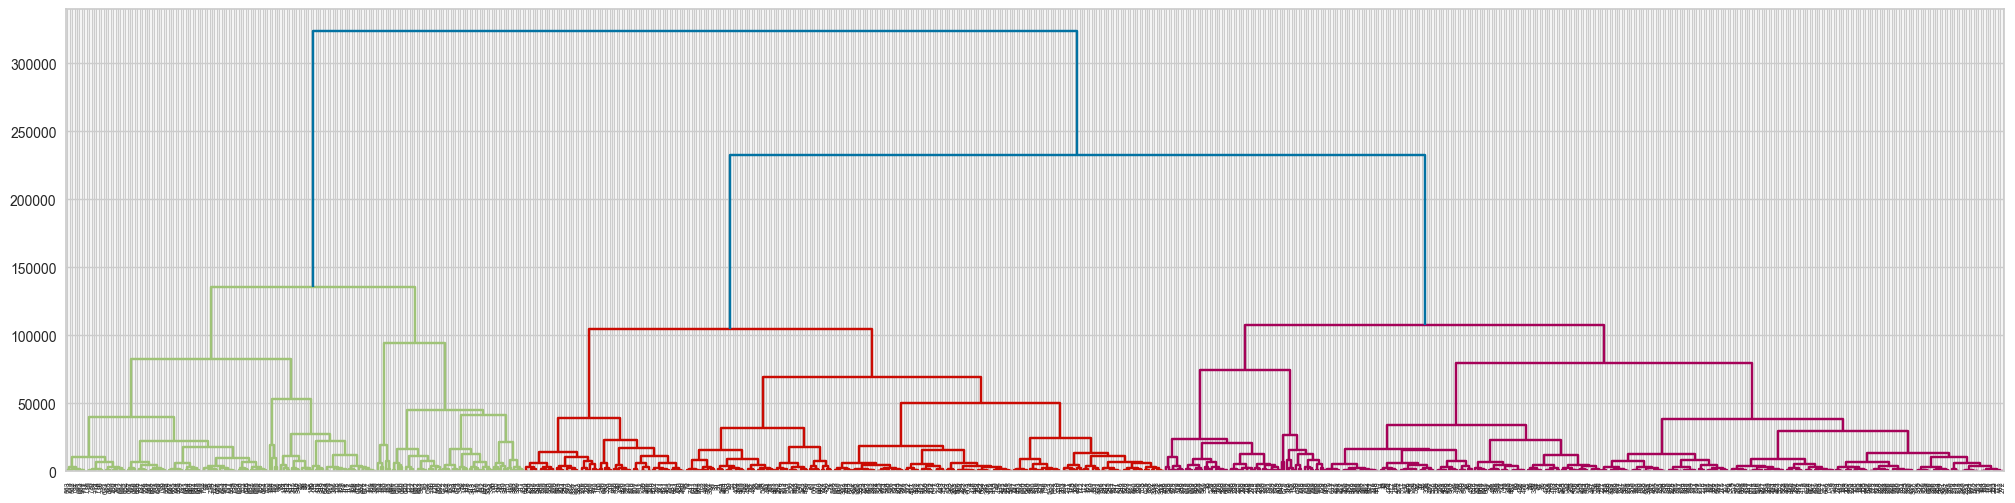

In [29]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [30]:
df=pd.read_csv('data/Billionaires.csv')

In [31]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<Axes: xlabel='selfMade', ylabel='count'>

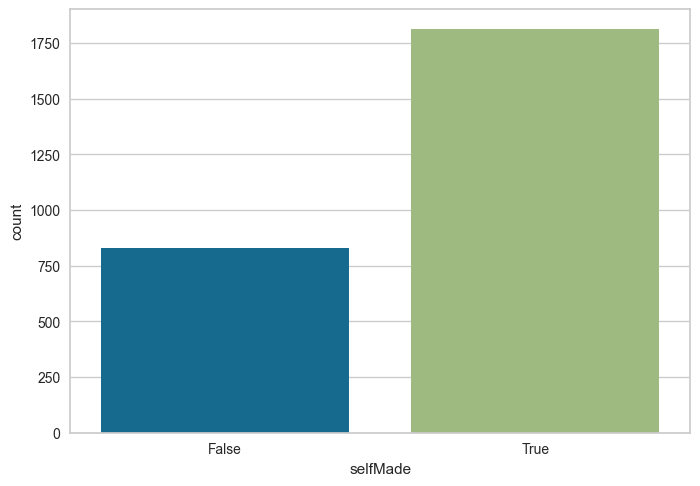

In [32]:
sns.countplot(x=df['selfMade'])

<Axes: xlabel='count', ylabel='country'>

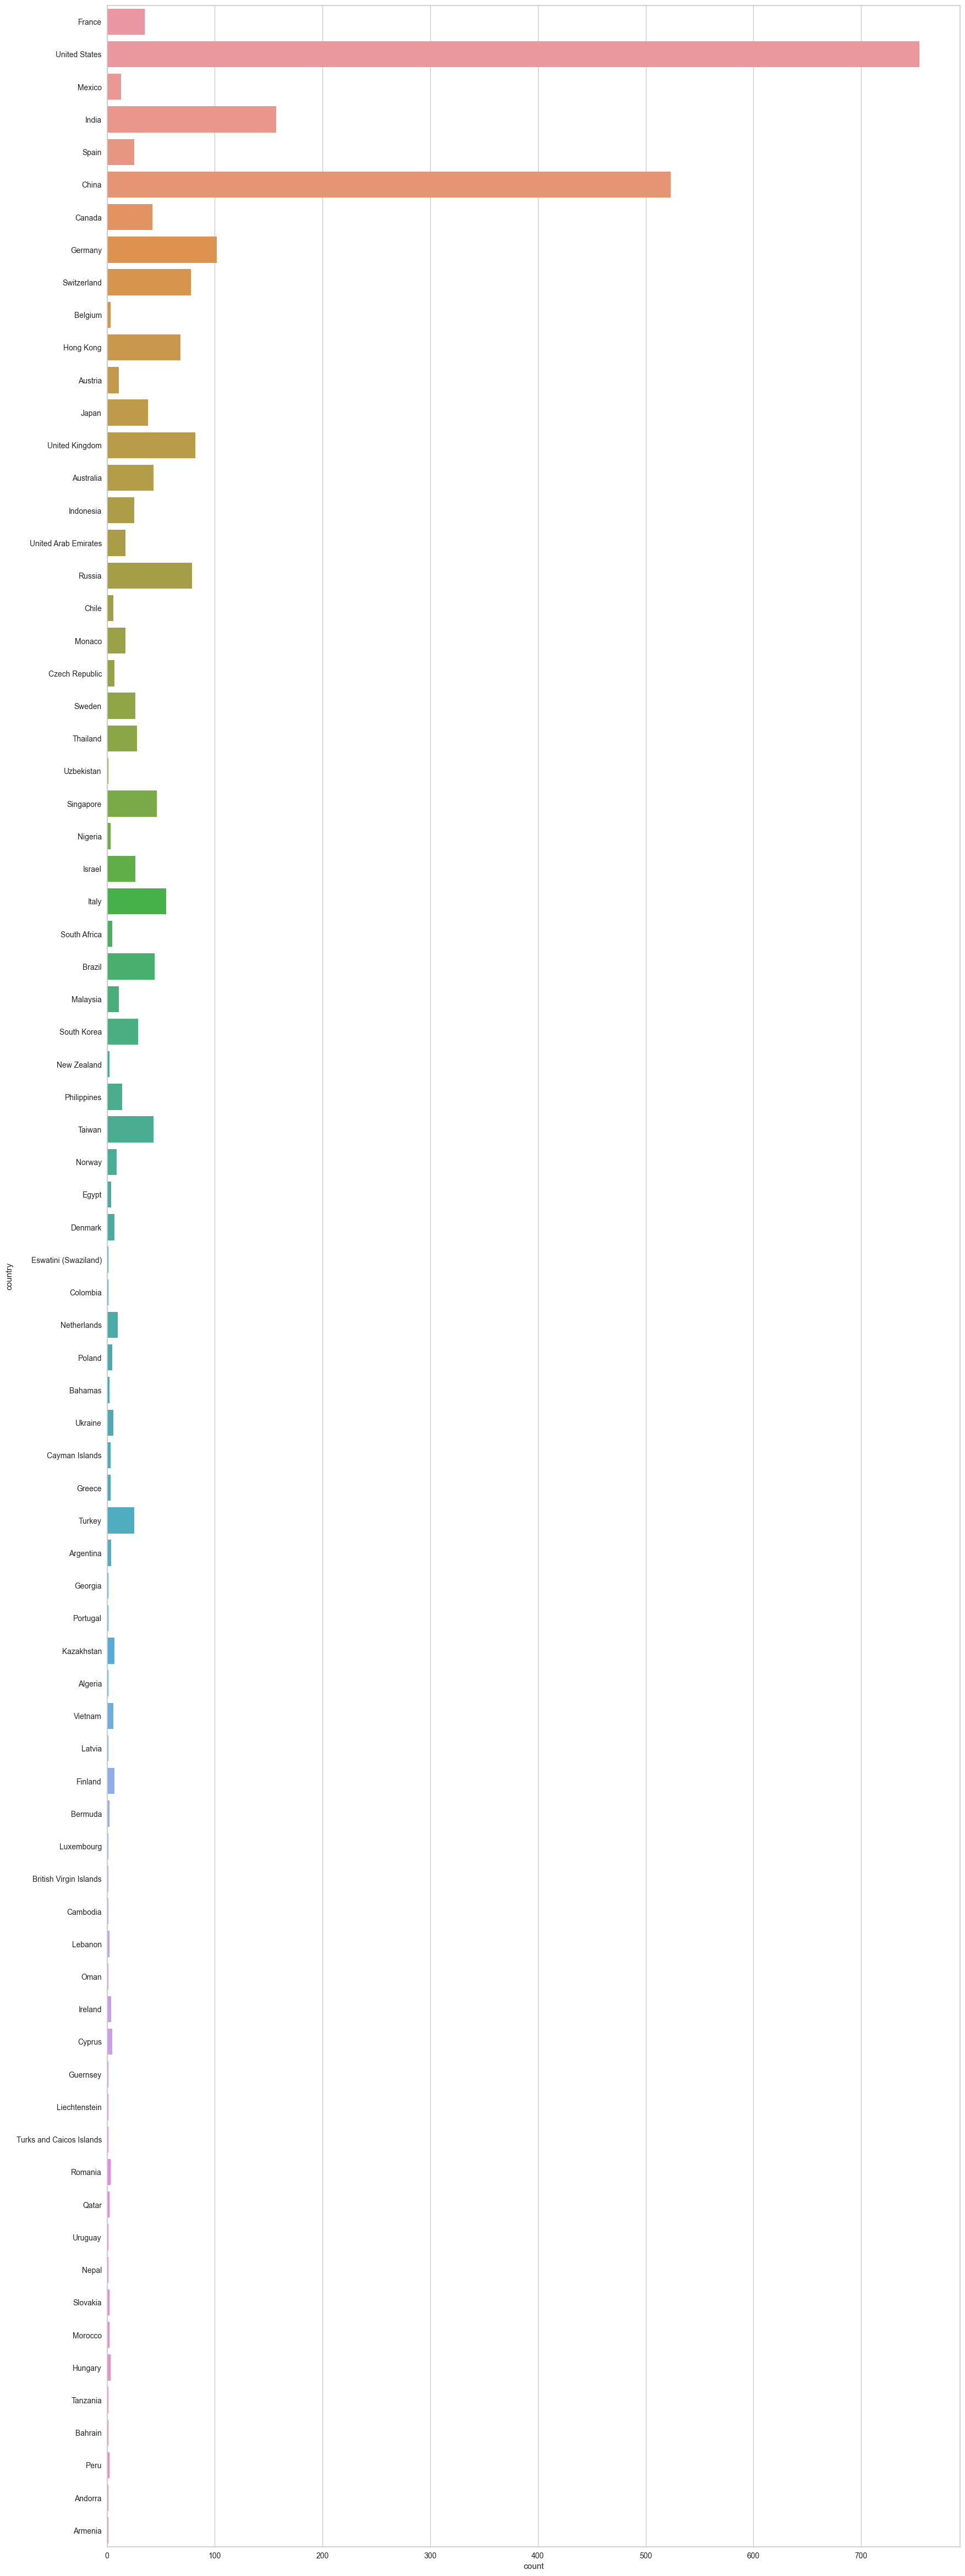

In [33]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'])

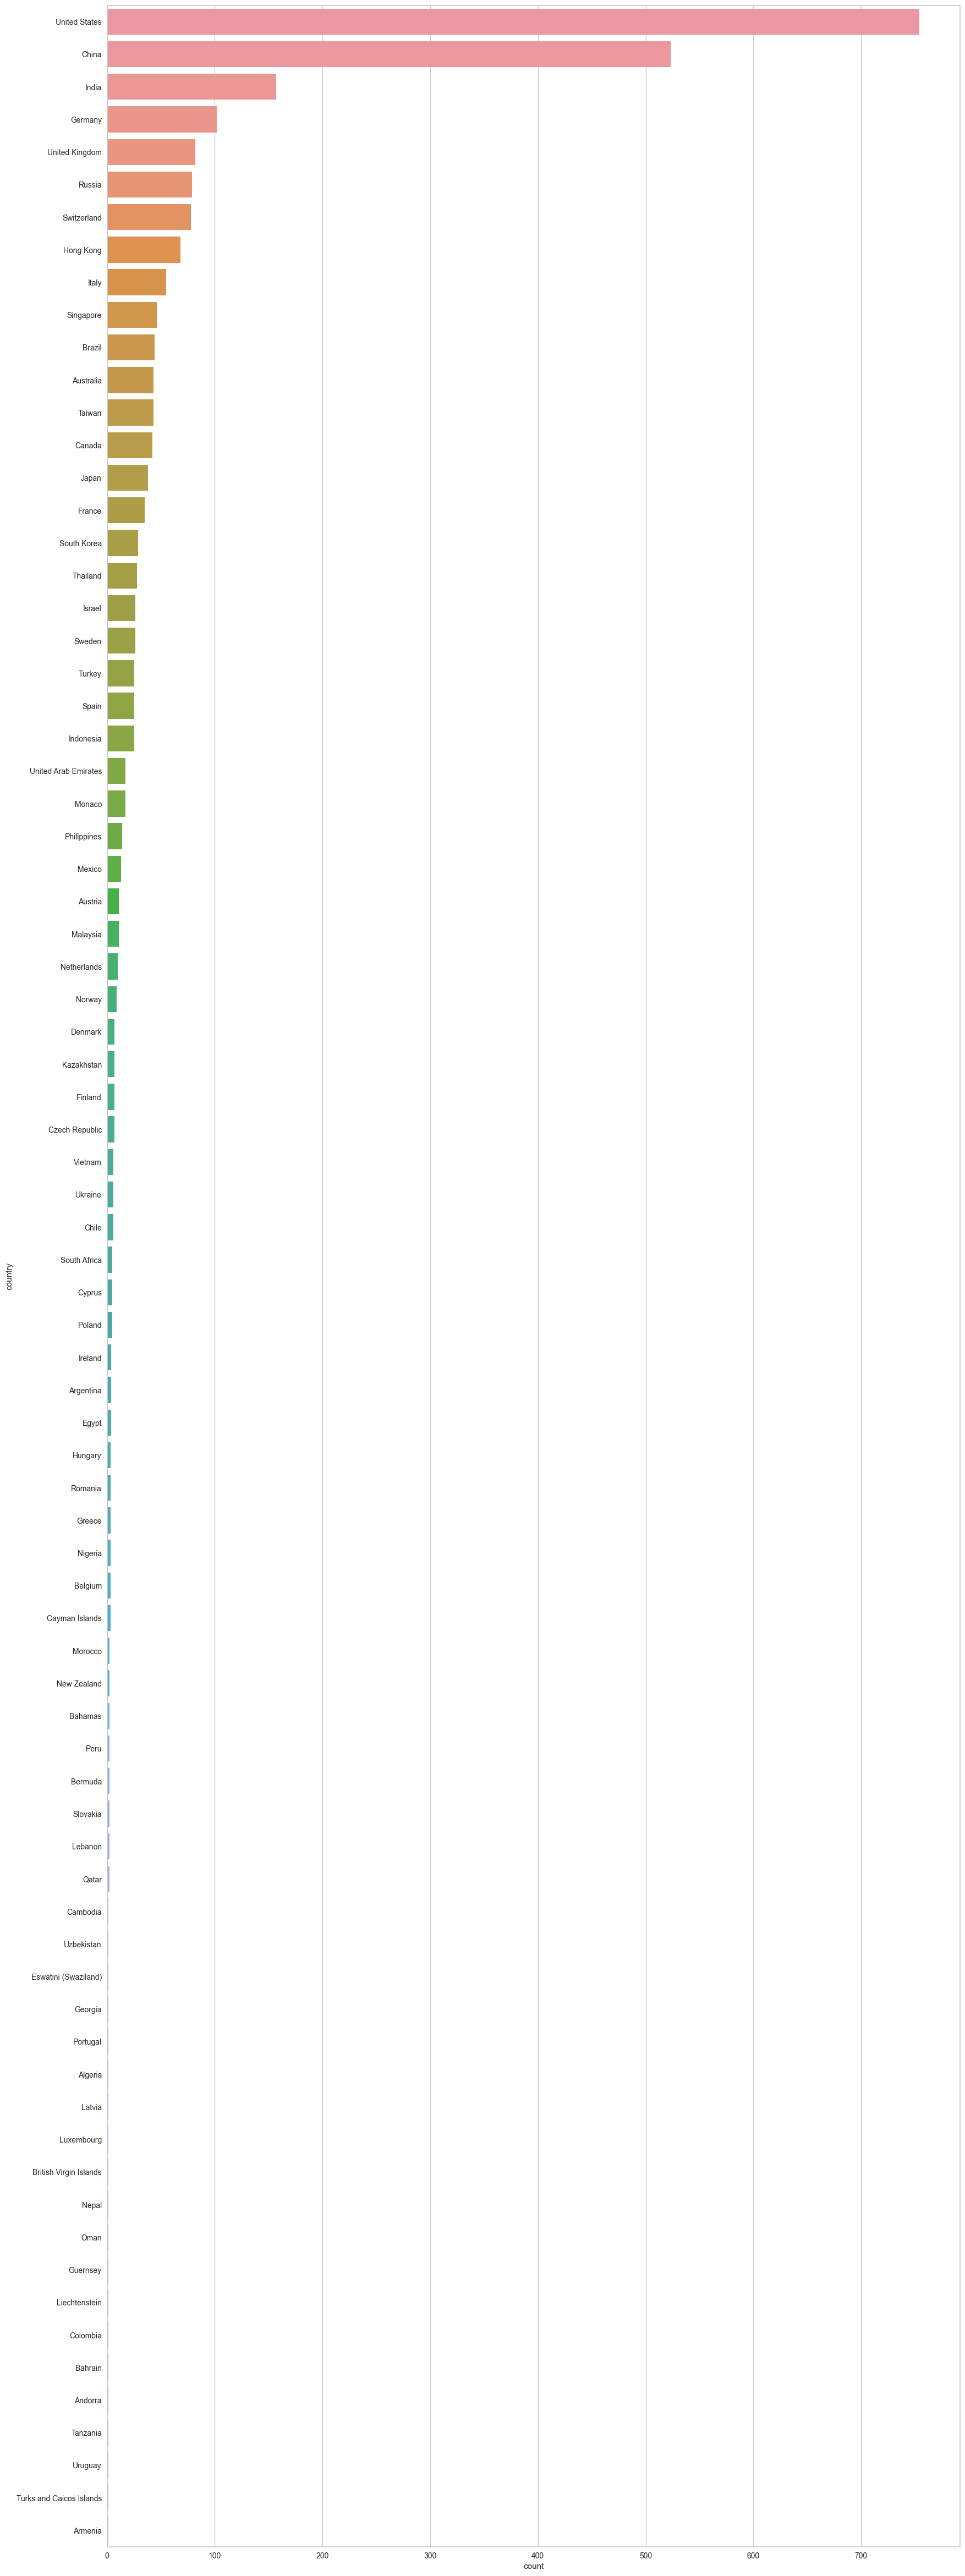

In [34]:
ydf=df['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'],order=ydf.index);

In [35]:
tr=df[df["country"]=="Turkey"]

<Axes: xlabel='selfMade', ylabel='count'>

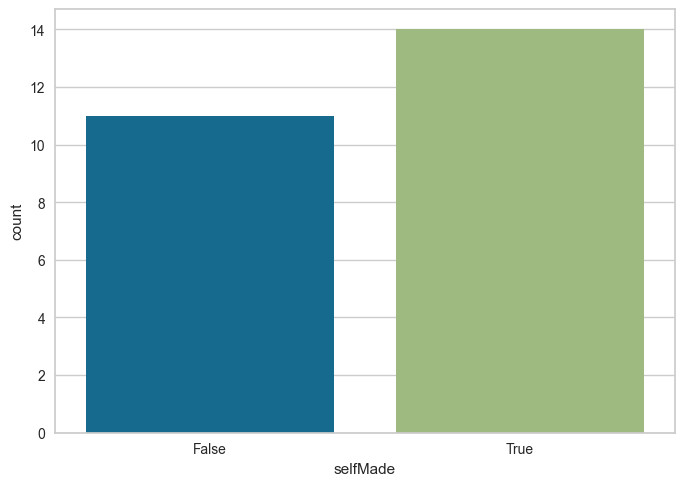

In [36]:
sns.countplot(x=tr['selfMade'])

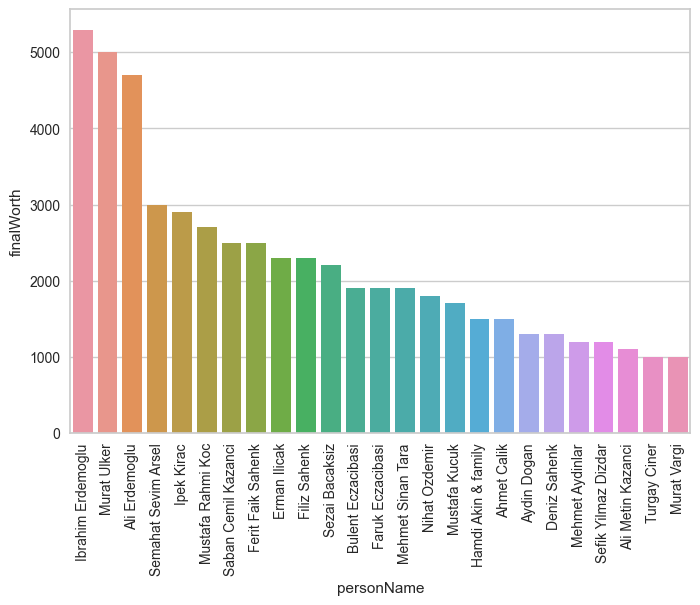

In [37]:
sns.barplot(x=tr['personName'],y=tr['finalWorth'])
plt.xticks(rotation=90);

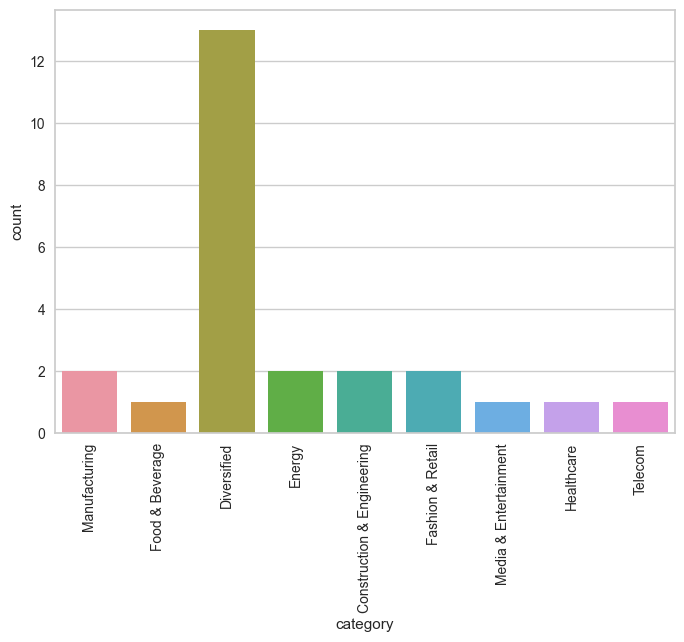

In [38]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

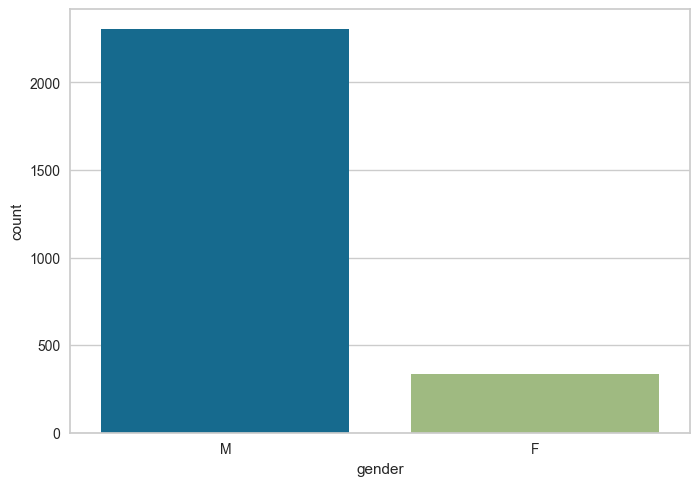

In [39]:
sns.countplot(x=df['gender'])

In [40]:
df['gender'].value_counts()

gender
M    2303
F     337
Name: count, dtype: int64